In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.optimizers import SGD

In [5]:
# Importing of libraries for data handling and viewing during handling
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
def chartit(img,n): # for Image Viewing without writing whole commands over and over
    #fname = 'image.png'
    #img=img.convert("L")
    figure(num=None, figsize=(n,n), dpi=80, edgecolor='k')
    arr = np.asarray(img)
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
    plt.show()
    return

# Data Importing with resizing and Batch making

In [6]:
# Data importing from download folder
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_folder='dataset/car_data/train'
train_image=image_dataset_from_directory(train_folder,color_mode='rgb', batch_size=32, image_size=(128, 128))
test_folder='dataset/car_data/test'
test_image=image_dataset_from_directory(test_folder,color_mode='rgb', batch_size=32, image_size=(128, 128))

Found 8144 files belonging to 196 classes.
Found 8041 files belonging to 196 classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_folder,
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_folder,
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')

# CNN MODEL

In [7]:
cnn = Sequential()
#Adding 1st Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 2nd Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 3rd Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 4th Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))
#Adding 5th Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

#Flatten
cnn.add(Flatten())

#Adding Input and Output Layer
cnn.add(Dense(units=256,activation='relu'))
cnn.add(Dense(units=256,activation='relu'))
cnn.add(Dense(units=256,activation='relu'))
cnn.add(Dense(units=196,activation='sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
history = cnn.fit_generator(train_data,
                            steps_per_epoch=100,
                            epochs=30,
                            validation_data=test_data,
                            validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 511s 5s/step - loss: 5.2794 - accuracy: 0.0059 - val_loss: 5.2775 - val_accuracy: 0.0069
Epoch 2/30
100/100 [==============================] - 429s 4s/step - loss: 5.2783 - accuracy: 0.0050 - val_loss: 5.2770 - val_accuracy: 0.0131
Epoch 3/30
100/100 [==============================] - 396s 4s/step - loss: 5.2776 - accuracy: 0.0100 - val_loss: 5.2773 - val_accuracy: 0.0044
Epoch 4/30
100/100 [==============================] - 344s 3s/step - loss: 5.2782 - accuracy: 0.0081 - val_loss: 5.2764 - val_accuracy: 0.0125
Epoch 5/30
100/100 [==============================] - 318s 3s/step - loss: 5.2777 - accuracy: 0.0097 - val_loss: 5.2749 - val_accuracy: 0.0063
Epoch 6/30
100/100 [==============================] - 295s 3s/step - loss: 5.2778 - accuracy: 0.0088 - val_loss: 5.2760 - val_accuracy: 0.0081
Epoch 7/30
100/100 [==============================] - 275s 3s/step

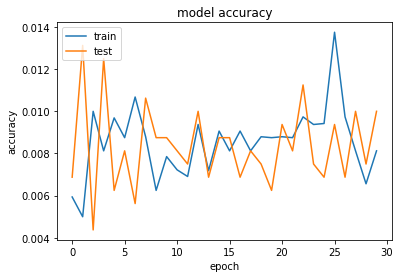

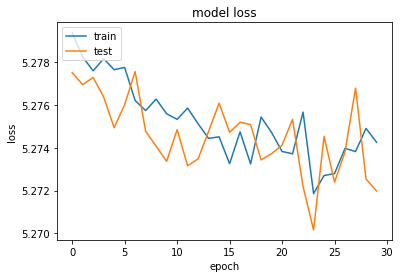

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss   
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)       